In [169]:
import numpy as np
import pandas as pd

1/ Redo the cleaning processes as presented in the data cleaning notebook, that include:
- Clean column names

- Convert RAM, Price, Weight into numerical columns (create new columns)

- Extract CPU speed from CPU column

- Correcting values of os column

- Handle missing values of os_version column

In [235]:
# Read file
laptops = pd.read_csv("laptops.csv", encoding="latin-1")

# Clean column names
def clean_label(s):
    s = s.strip();
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s
new_label = [clean_label(label) for label in laptops.columns]
laptops.columns = new_label

# Convert RAM, Price, Weight into numerical columns (create new columns)
laptops['ram_num'] = laptops.ram.str.slice(0, -2).astype("int")
laptops['price_euros_num'] = laptops.price_euros.str.replace(",", ".").astype('float')
laptops['weight_num'] = laptops.weight.str.replace(r'kg.*', '').astype('float');

# Extract CPU speed from CPU column
laptops['cpu_speed'] = laptops.cpu.str.replace("GHz", "").str.extract("([0-9\.]*)$").astype('float')

# Correcting values of os column
mapping = {
    "Windows": "Windows", 
    "No OS": "No OS", 
    "Linux": "Linux", 
    "Chrome OS": "Chrome OS", 
    "macOS": "macOS", 
    "Mac OS": "macOS", 
    "Android": "Android"
}
laptops['os_new'] = laptops.os.map(mapping)

# Handle missing values of os_version column
laptops.loc[laptops.os == "macOS", "os_version"] = "X"
laptops.dropna(inplace=True)

2/ Convert Screen Size column in to numeric and use that column to answer:
- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

In [276]:
# What is the popular screen size ?
laptops.screen_size.value_counts().index[0]

# What is the minimum screen size of Ultrabook ?
laptops.loc[laptops.category == "Ultrabook", "screen_size"].min()

# What is the average screen size of gaming laptop ?
average_screen_size_of_gaming_laptop = laptops[laptops.category == "Gaming"].screen_size.str.replace('"','').astype('float').mean()
average_screen_size_of_gaming_laptop

16.378645833333334

3/ Extract Screen Resolution (for example 2880x1800), and answer:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

In [335]:
# How many laptop has full hd (1920x1080) screen ?
# laptops.screen.str.split().apply(lambda x: x[-1])
laptops['screen_resolution'] = laptops.screen.str.extract("(\d.\w.x.*\d)")
(laptops['screen_resolution'] == "1920x1080").sum()

# What is the popular screen resolution of Macbook ?
laptops.loc[laptops.model_name.str.startswith("Mac"), 'model_name'] = 'MacBook'
laptops.loc[laptops.model_name == 'MacBook', 'screen_resolution'].value_counts()

2304x1440    6
2560x1600    6
2880x1800    4
1440x900     4
1366x768     1
Name: screen_resolution, dtype: int64

4/ Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

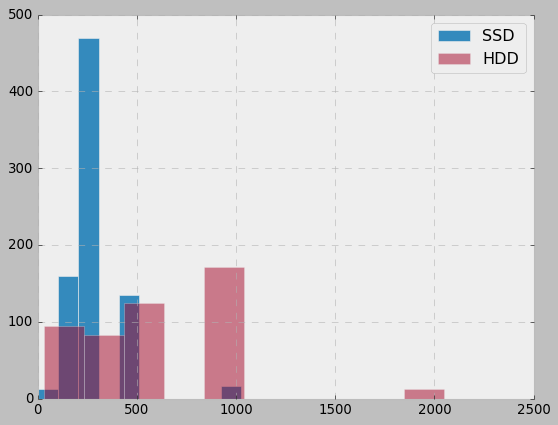

In [396]:
laptops['storage_gb'] = laptops.storage.str.split().apply(lambda x: x[0]).apply(lambda x: int(x[:-2]) if x.endswith("GB") else int(x[0]) * 1024)
laptops['storage_ssd'] = laptops.storage.str.contains("SSD")
laptops['storage_hdd'] = laptops.storage.str.contains("HDD")
# - How many laptop have ssd storage ? How many laptop have hdd storage ?
laptops['storage_ssd'].sum()
laptops['storage_hdd'].sum()

# - On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.
import matplotlib.pyplot as plt
plt.style.use("bmh")
laptops.loc[laptops.storage_ssd, "storage_gb"].hist(label='SSD')
laptops.loc[laptops.storage_hdd, "storage_gb"].hist(label='HDD', alpha=0.5)
plt.legend()